In [1]:
#install.packages("lme4")
#install.packages("statmod")
#install.packages("afex")
#install.packages("jtools")
#install.packages("nlme")

#if (!requireNamespace("BiocManager", quietly = TRUE))
#    install.packages("BiocManager")
#BiocManager::install("qvalue")

In [2]:
# load the necessary libraries
library(lme4)
library(afex)
library(jtools)
library(ggplot2)
library(nlme)
library(qvalue)

Loading required package: Matrix

************
Welcome to afex. For support visit: http://afex.singmann.science/

- Functions for ANOVAs: aov_car(), aov_ez(), and aov_4()
- Methods for calculating p-values with mixed(): 'S', 'KR', 'LRT', and 'PB'
- 'afex_aov' and 'mixed' objects can be passed to emmeans() for follow-up tests
- NEWS: emmeans() for ANOVA models now uses model = 'multivariate' as default.
- Get and set global package options with: afex_options()
- Set orthogonal sum-to-zero contrasts globally: set_sum_contrasts()
- For example analyses see: browseVignettes("afex")
************


Attaching package: ‘afex’


The following object is masked from ‘package:lme4’:

    lmer



Attaching package: ‘nlme’


The following object is masked from ‘package:lme4’:

    lmList




In [3]:
# load metadata
metadata <- read.delim("/Users/dagmarschierova/MEGA/MBÚ/swabs_ZS/inputs/metadata_swabs_cut.tsv")
head(metadata)

,SampleID,Label,Plate,Position,BarcodeSequence,LinkerPrimerSequence,ForwardBarcodeSequence,ReversePrimerSequence,ReverseBarcodeSequence,TruSeqAdapter,⋯,Patient_Visit_SS_SAE,Patient_Visit_AllTogether_SAE_place,Patient_Visit_SAE_place,Patient_Visit_AllTogether_SAE_Eco,Patient_Visit_SAE_Eco,Dg_RS3,Dg_Drug_RS3,Dg_SAE_RS3,Dg_SS_SAE_RS3,Dg_SSEco_SAE_RS3
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,P3_PK97_I_C,IS_P3_PK97_I_C,plate_1,A1,AAAGCACCTTCCA,GTCCTACGGGNGGCWGCAG,AAAGC,GGACTACHVGGGTWTCTAAT,ACCTTCC,ACAGTG,⋯,P3_visit_1_C_no,P3_visit_1_none,P3_visit_1_none,P3_visit_1_none,P3_visit_1_none,CD_Part,CD_ADA_Part,CD_no_Part,CD_C_no_Part,CD_SeS_no_Part
2,P3_PK97_I_E,IS_P3_PK97_I_E,plate_1,B1,AAAGCAGCCACCA,GTCCTACGGGNGGCWGCAG,AAAGC,GGACTACHVGGGTWTCTAAT,AGCCACC,ACAGTG,⋯,P3_visit_1_E_no,P3_visit_1_none,P3_visit_1_none,P3_visit_1_none,P3_visit_1_none,CD_Part,CD_ADA_Part,CD_no_Part,CD_E_no_Part,CD_Mo_no_Part
3,P3_PK97_II_C,IS_P3_PK97_II_C,plate_1,C1,AAAGCAACAGCCA,GTCCTACGGGNGGCWGCAG,AAAGC,GGACTACHVGGGTWTCTAAT,AACAGCC,ACAGTG,⋯,P3_visit_2_C_yes,P3_visit_2_C,P3_visit_2_C,P3_visit_2_SeS,P3_visit_2_SeS,CD_Part,CD_ADA_Part,CD_yes_Part,CD_C_yes_Part,CD_SeS_yes_Part
4,P3_PK97_II_E,IS_P3_PK97_II_E,plate_1,D1,AAAGCACGGCCCA,GTCCTACGGGNGGCWGCAG,AAAGC,GGACTACHVGGGTWTCTAAT,ACGGCCC,ACAGTG,⋯,P3_visit_2_E_yes,P3_visit_2_E,P3_visit_2_E,P3_visit_2_Mo,P3_visit_2_Mo,CD_Part,CD_ADA_Part,CD_yes_Part,CD_E_yes_Part,CD_Mo_yes_Part
5,P3_PK97_III_C,IS_P3_PK97_III_C,plate_1,E1,AAAGCACTGGCCA,GTCCTACGGGNGGCWGCAG,AAAGC,GGACTACHVGGGTWTCTAAT,ACTGGCC,ACAGTG,⋯,P3_visit_3_C_yes,P3_visit_3_C,P3_visit_3_C,P3_visit_3_SeS,P3_visit_3_SeS,CD_Part,CD_ADA_Part,CD_yes_Part,CD_C_yes_Part,CD_SeS_yes_Part
6,P3_PK97_III_E,IS_P3_PK97_III_E,plate_1,F1,AAAGCAAGGACCA,GTCCTACGGGNGGCWGCAG,AAAGC,GGACTACHVGGGTWTCTAAT,AAGGACC,ACAGTG,⋯,P3_visit_3_E_yes,P3_visit_3_E,P3_visit_3_E,P3_visit_3_Mo,P3_visit_3_Mo,CD_Part,CD_ADA_Part,CD_yes_Part,CD_E_yes_Part,CD_Mo_yes_Part


In [4]:
# load alpha diversity
shannon <- read.delim("/Users/dagmarschierova/MEGA/MBÚ/swabs_ZS/outputs/qiime2_results_290230/diversity-D_UST/alpha/shannon_tabulated_exported.tsv")
chao1 <- read.delim("/Users/dagmarschierova/MEGA/MBÚ/swabs_ZS/outputs/qiime2_results_290230/diversity-D_UST/alpha/chao1_tabulated_exported.tsv")
asv <- read.delim("/Users/dagmarschierova/MEGA/MBÚ/swabs_ZS/outputs/qiime2_results_290230/diversity-D_UST/alpha/observed_features_tabulated_exported.tsv")
faith <- read.delim("/Users/dagmarschierova/MEGA/MBÚ/swabs_ZS/outputs/qiime2_results_290230/diversity-D_UST/alpha/faith_pd_tabulated_exported.tsv")


In [5]:
# merge alpha diversity with metadata
metadata <- merge(metadata,shannon, by = c("SampleID"))
metadata <- merge(metadata,chao1, by = c("SampleID"))
metadata <- merge(metadata,asv, by = c("SampleID"))
metadata <- merge(metadata,faith, by = c("SampleID"))
head(metadata)

,SampleID,Label,Plate,Position,BarcodeSequence,LinkerPrimerSequence,ForwardBarcodeSequence,ReversePrimerSequence,ReverseBarcodeSequence,TruSeqAdapter,⋯,Patient_Visit_SAE_Eco,Dg_RS3,Dg_Drug_RS3,Dg_SAE_RS3,Dg_SS_SAE_RS3,Dg_SSEco_SAE_RS3,shannon_entropy,chao1,observed_features,faith_pd
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<dbl>
1,K11_JV87_I_D,K11_JV87_I_D,plate_4,G4,ACGAAACGCTCCA,GTCCTACGGGNGGCWGCAG,ACGAA,GGACTACHVGGGTWTCTAAT,ACGCTCC,GTGAAA,⋯,HC11_visit_1HC_HC,HC_HC,HC_HC_HC,HC_HC_HC,HC_D_HC_HC,HC_SeT_HC_HC,3.563212,45.14286,45,14.240778
2,K11_JV87_IV_D,K11_JV87_IV_D,plate_4,H4,ACGAAAGCGCCCA,GTCCTACGGGNGGCWGCAG,ACGAA,GGACTACHVGGGTWTCTAAT,AGCGCCC,GTGAAA,⋯,HC11_visit_4HC_HC,HC_HC,HC_HC_HC,HC_HC_HC,HC_D_HC_HC,HC_SeT_HC_HC,3.650485,120.07692,97,33.984119
3,K12_KJ78_I_D,K12_KJ78_I_D,plate_4,C5,ACGAAAACCCGCA,GTCCTACGGGNGGCWGCAG,ACGAA,GGACTACHVGGGTWTCTAAT,AACCCGC,GTGAAA,⋯,HC12_visit_1HC_HC,HC_HC,HC_HC_HC,HC_HC_HC,HC_D_HC_HC,HC_SeT_HC_HC,4.467307,134.54167,124,67.705203
4,K12_KJ78_IV_D,K12_KJ78_IV_D,plate_4,D5,ACGAAATCCCTCA,GTCCTACGGGNGGCWGCAG,ACGAA,GGACTACHVGGGTWTCTAAT,ATCCCTC,GTGAAA,⋯,HC12_visit_4HC_HC,HC_HC,HC_HC_HC,HC_HC_HC,HC_D_HC_HC,HC_SeT_HC_HC,4.970108,125.10000,116,38.369685
5,K16_PP75_I_D,K16_PP75_I_D,plate_4,F5,ACGAAAGGCCTCA,GTCCTACGGGNGGCWGCAG,ACGAA,GGACTACHVGGGTWTCTAAT,AGGCCTC,GTGAAA,⋯,HC16_visit_1HC_HC,HC_HC,HC_HC_HC,HC_HC_HC,HC_D_HC_HC,HC_SeT_HC_HC,4.291425,124.42857,103,34.482811
6,K16_PP75_IV_D,K16_PP75_IV_D,plate_4,H5,AAAGAGCACGAAA,GTCCTACGGGNGGCWGCAG,ACGAA,GGACTACHVGGGTWTCTAAT,AAAGAGC,GTGAAA,⋯,HC16_visit_4HC_HC,HC_HC,HC_HC_HC,HC_HC_HC,HC_D_HC_HC,HC_SeT_HC_HC,4.808523,79.20000,78,5.497948


In [6]:
# filter data
metadata.sub <- metadata[metadata$Week!="week_x",]
metadata.subCD <- metadata.sub[metadata.sub$Dg=="CD",]
metadata.subUC <- metadata.sub[metadata.sub$Dg=="UC",]
metadata.subHC <- metadata.sub[metadata.sub$Dg=="HC",]
metadata.subUST <- metadata.sub[metadata.sub$Drug=="UST",]
metadata.subUST40 <- metadata.subUST[metadata.subUST$Week=="week_0" | metadata.subUST$Week=="week_40",]


In [7]:
# model for IBD alpha div ~ Week
model1sh <- lmer(shannon_entropy~Week_num+(1|Patient),data=metadata.subUST)
summary(model1sh)
model1ch <- lmer(chao1~Week_num+(1|Patient),data=metadata.subUST)
summary(model1ch)
model1as <- lmer(observed_features~Week_num+(1|Patient),data=metadata.subUST)
summary(model1as)
model1fa <- lmer(faith_pd~Week_num+(1|Patient),data=metadata.subUST)
summary(model1fa)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: shannon_entropy ~ Week_num + (1 | Patient)
   Data: metadata.subUST

REML criterion at convergence: 129.5

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.15558 -0.56066  0.03828  0.67244  2.15051 

Random effects:
 Groups   Name        Variance Std.Dev.
 Patient  (Intercept) 0.1343   0.3664  
 Residual             0.8486   0.9212  
Number of obs: 44, groups:  Patient, 9

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)  4.75664    0.27216 26.87886  17.477 3.33e-16 ***
Week_num     0.01222    0.01080 35.49591   1.132    0.265    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
         (Intr)
Week_num -0.727

boundary (singular) fit: see ?isSingular



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: chao1 ~ Week_num + (1 | Patient)
   Data: metadata.subUST

REML criterion at convergence: 447.7

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.73118 -0.67930  0.02114  0.56128  2.35864 

Random effects:
 Groups   Name        Variance Std.Dev.
 Patient  (Intercept)    0      0.00   
 Residual             1844     42.95   
Number of obs: 44, groups:  Patient, 9

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)  80.3584    11.3005 42.0000   7.111 1.01e-08 ***
Week_num      0.7247     0.4994 42.0000   1.451    0.154    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
         (Intr)
Week_num -0.820
optimizer (nloptwrap) convergence code: 0 (OK)
boundary (singular) fit: see ?isSingular


boundary (singular) fit: see ?isSingular



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: observed_features ~ Week_num + (1 | Patient)
   Data: metadata.subUST

REML criterion at convergence: 442.3

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.80814 -0.67120 -0.06849  0.52800  2.54060 

Random effects:
 Groups   Name        Variance Std.Dev.
 Patient  (Intercept)    0      0.00   
 Residual             1620     40.24   
Number of obs: 44, groups:  Patient, 9

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)  75.0830    10.5893 42.0000   7.090 1.08e-08 ***
Week_num      0.7921     0.4680 42.0000   1.693   0.0979 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
         (Intr)
Week_num -0.820
optimizer (nloptwrap) convergence code: 0 (OK)
boundary (singular) fit: see ?isSingular


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: faith_pd ~ Week_num + (1 | Patient)
   Data: metadata.subUST

REML criterion at convergence: 328.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.4549 -0.6153 -0.2027  0.4765  2.2155 

Random effects:
 Groups   Name        Variance Std.Dev.
 Patient  (Intercept) 20.08    4.482   
 Residual             93.66    9.678   
Number of obs: 44, groups:  Patient, 9

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept) 16.59401    2.96112 25.82123   5.604 7.05e-06 ***
Week_num     0.02256    0.11360 36.02534   0.199    0.844    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
         (Intr)
Week_num -0.701

In [8]:
# model for alpha div ~ HBI
model2sh <- lmer(shannon_entropy~HBI_num+(1|Patient),data=metadata.subUST)
summary(model2sh)
model2ch <- lmer(chao1~HBI_num+(1|Patient),data=metadata.subUST)
summary(model2ch)
model2as <- lmer(observed_features~HBI_num+(1|Patient),data=metadata.subUST)
summary(model2as)
model2fa <- lmer(faith_pd~HBI_num+(1|Patient),data=metadata.subUST)
summary(model2fa)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: shannon_entropy ~ HBI_num + (1 | Patient)
   Data: metadata.subUST

REML criterion at convergence: 93

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.9625 -0.6381  0.1877  0.6331  2.0674 

Random effects:
 Groups   Name        Variance Std.Dev.
 Patient  (Intercept) 0.2111   0.4595  
 Residual             0.8533   0.9237  
Number of obs: 32, groups:  Patient, 7

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)  5.14847    0.33411 11.97258  15.410 2.94e-09 ***
HBI_num     -0.05229    0.08125 29.65573  -0.644    0.525    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
        (Intr)
HBI_num -0.682

boundary (singular) fit: see ?isSingular



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: chao1 ~ HBI_num + (1 | Patient)
   Data: metadata.subUST

REML criterion at convergence: 315.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.3711 -0.7318 -0.1632  0.4543  2.4681 

Random effects:
 Groups   Name        Variance Std.Dev.
 Patient  (Intercept)    0      0.00   
 Residual             1618     40.23   
Number of obs: 32, groups:  Patient, 7

Fixed effects:
            Estimate Std. Error     df t value Pr(>|t|)    
(Intercept)   97.296     11.104 30.000   8.763 9.03e-10 ***
HBI_num       -1.664      3.137 30.000  -0.531      0.6    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
        (Intr)
HBI_num -0.768
optimizer (nloptwrap) convergence code: 0 (OK)
boundary (singular) fit: see ?isSingular


boundary (singular) fit: see ?isSingular



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: observed_features ~ HBI_num + (1 | Patient)
   Data: metadata.subUST

REML criterion at convergence: 313.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.3283 -0.6900 -0.2190  0.4578  2.5759 

Random effects:
 Groups   Name        Variance Std.Dev.
 Patient  (Intercept)    0      0.00   
 Residual             1501     38.74   
Number of obs: 32, groups:  Patient, 7

Fixed effects:
            Estimate Std. Error     df t value Pr(>|t|)    
(Intercept)   93.351     10.695 30.000   8.729 9.82e-10 ***
HBI_num       -1.577      3.021 30.000  -0.522    0.605    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
        (Intr)
HBI_num -0.768
optimizer (nloptwrap) convergence code: 0 (OK)
boundary (singular) fit: see ?isSingular


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: faith_pd ~ HBI_num + (1 | Patient)
   Data: metadata.subUST

REML criterion at convergence: 237.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.4392 -0.7199 -0.1851  0.4525  2.0789 

Random effects:
 Groups   Name        Variance Std.Dev.
 Patient  (Intercept)  15.87    3.984  
 Residual             110.16   10.496  
Number of obs: 32, groups:  Patient, 7

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)  19.7109     3.4839 11.6420   5.658 0.000119 ***
HBI_num      -0.3014     0.8945 28.3153  -0.337 0.738618    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
        (Intr)
HBI_num -0.714

In [9]:
# model for CD HBI ~ Week
model3 <- lmer(HBI_num~Week_num+(1|Patient),data=metadata.subCD)
summary(model3)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: HBI_num ~ Week_num + (1 | Patient)
   Data: metadata.subCD

REML criterion at convergence: 143.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.6585 -0.5909 -0.2362  0.2769  2.4936 

Random effects:
 Groups   Name        Variance Std.Dev.
 Patient  (Intercept) 1.557    1.248   
 Residual             3.774    1.943   
Number of obs: 32, groups:  Patient, 7

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)  3.54867    0.76457 15.25455   4.641 0.000306 ***
Week_num    -0.03969    0.02639 25.98024  -1.504 0.144542    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
         (Intr)
Week_num -0.622

In [10]:
# model for IBD alpha div ~ Week
model4sh <- lmer(shannon_entropy~Week+(1|Patient),data=metadata.subUST40)
summary(model4sh)
model4ch <- lmer(chao1~Week+(1|Patient),data=metadata.subUST40)
summary(model4ch)
model4as <- lmer(observed_features~Week+(1|Patient),data=metadata.subUST40)
summary(model4as)
model4fa <- lmer(faith_pd~Week+(1|Patient),data=metadata.subUST40)
summary(model4fa)

boundary (singular) fit: see ?isSingular



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: shannon_entropy ~ Week + (1 | Patient)
   Data: metadata.subUST40

REML criterion at convergence: 32.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.9910 -0.4989  0.3126  0.6374  1.2729 

Random effects:
 Groups   Name        Variance Std.Dev.
 Patient  (Intercept) 0.0000   0.0000  
 Residual             0.8251   0.9083  
Number of obs: 13, groups:  Patient, 8

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)  4.65442    0.32115 11.00000  14.493 1.64e-08 ***
Weekweek_40  0.07804    0.51783 11.00000   0.151    0.883    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
Weekweek_40 -0.620
optimizer (nloptwrap) convergence code: 0 (OK)
boundary (singular) fit: see ?isSingular


boundary (singular) fit: see ?isSingular



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: chao1 ~ Week + (1 | Patient)
   Data: metadata.subUST40

REML criterion at convergence: 113.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.5841 -0.6544  0.1485  0.5512  1.8632 

Random effects:
 Groups   Name        Variance Std.Dev.
 Patient  (Intercept)    0      0.00   
 Residual             1252     35.39   
Number of obs: 13, groups:  Patient, 8

Fixed effects:
            Estimate Std. Error    df t value Pr(>|t|)    
(Intercept)    78.49      12.51 11.00   6.273 6.06e-05 ***
Weekweek_40    12.57      20.18 11.00   0.623    0.546    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
Weekweek_40 -0.620
optimizer (nloptwrap) convergence code: 0 (OK)
boundary (singular) fit: see ?isSingular


boundary (singular) fit: see ?isSingular



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: observed_features ~ Week + (1 | Patient)
   Data: metadata.subUST40

REML criterion at convergence: 110.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.7111 -0.5248 -0.0159  0.5884  1.7874 

Random effects:
 Groups   Name        Variance Std.Dev.
 Patient  (Intercept)   0.0     0.00   
 Residual             988.6    31.44   
Number of obs: 13, groups:  Patient, 8

Fixed effects:
            Estimate Std. Error    df t value Pr(>|t|)    
(Intercept)    71.50      11.12 11.00   6.432 4.86e-05 ***
Weekweek_40    16.30      17.92 11.00   0.909    0.383    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
Weekweek_40 -0.620
optimizer (nloptwrap) convergence code: 0 (OK)
boundary (singular) fit: see ?isSingular


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: faith_pd ~ Week + (1 | Patient)
   Data: metadata.subUST40

REML criterion at convergence: 75.1

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.21523 -0.45254 -0.01909  0.57935  0.89677 

Random effects:
 Groups   Name        Variance Std.Dev.
 Patient  (Intercept) 51.670   7.188   
 Residual              9.424   3.070   
Number of obs: 13, groups:  Patient, 8

Fixed effects:
            Estimate Std. Error     df t value Pr(>|t|)    
(Intercept)   17.154      2.763  7.465   6.207 0.000341 ***
Weekweek_40   -7.119      1.913  4.030  -3.721 0.020188 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
Weekweek_40 -0.223

In [20]:
# model for IBD alpha div ~ Past biological therapy
model5sh <- lmer(shannon_entropy~Past_biological_therapy+(1|Patient),data=metadata.subUST)
summary(model5sh)
model5ch <- lmer(chao1~Past_biological_therapy+(1|Patient),data=metadata.subUST)
summary(model5ch)
model5as <- lmer(observed_features~Past_biological_therapy+(1|Patient),data=metadata.subUST)
summary(model5as)
model5fa <- lmer(faith_pd~Past_biological_therapy+(1|Patient),data=metadata.subUST)
summary(model5fa)

boundary (singular) fit: see ?isSingular



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: shannon_entropy ~ Past_biological_therapy + (1 | Patient)
   Data: metadata.subUST

REML criterion at convergence: 115.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.1712 -0.6337 -0.0081  0.5516  2.3338 

Random effects:
 Groups   Name        Variance Std.Dev.
 Patient  (Intercept) 0.0000   0.0000  
 Residual             0.7937   0.8909  
Number of obs: 44, groups:  Patient, 9

Fixed effects:
                           Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)                  5.6491     0.2471 42.0000  22.862   <2e-16 ***
Past_biological_therapyyes  -0.9558     0.2944 42.0000  -3.247   0.0023 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
Pst_blgcl_t -0.839
optimizer (nloptwrap) convergence code: 0 (OK)
boundary (singular) fit: see ?isSingular


boundary (singular) fit: see ?isSingular



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: chao1 ~ Past_biological_therapy + (1 | Patient)
   Data: metadata.subUST

REML criterion at convergence: 441.4

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.37390 -0.79269 -0.03894  0.57260  2.43446 

Random effects:
 Groups   Name        Variance Std.Dev.
 Patient  (Intercept)    0      0.00   
 Residual             1860     43.13   
Number of obs: 44, groups:  Patient, 9

Fixed effects:
                           Estimate Std. Error     df t value Pr(>|t|)    
(Intercept)                  107.02      11.96  42.00   8.947 2.79e-11 ***
Past_biological_therapyyes   -18.77      14.25  42.00  -1.317    0.195    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
Pst_blgcl_t -0.839
optimizer (nloptwrap) convergence code: 0 (OK)
boundary (singular) fit: see ?isSingular


boundary (singular) fit: see ?isSingular



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: observed_features ~ Past_biological_therapy + (1 | Patient)
   Data: metadata.subUST

REML criterion at convergence: 436.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.3691 -0.7678 -0.1100  0.5745  2.5670 

Random effects:
 Groups   Name        Variance Std.Dev.
 Patient  (Intercept)    0      0.0    
 Residual             1673     40.9    
Number of obs: 44, groups:  Patient, 9

Fixed effects:
                           Estimate Std. Error     df t value Pr(>|t|)    
(Intercept)                  101.15      11.34  42.00   8.916 3.07e-11 ***
Past_biological_therapyyes   -16.15      13.52  42.00  -1.195    0.239    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
Pst_blgcl_t -0.839
optimizer (nloptwrap) convergence code: 0 (OK)
boundary (singular) fit: see ?isSingular


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: faith_pd ~ Past_biological_therapy + (1 | Patient)
   Data: metadata.subUST

REML criterion at convergence: 318.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.5751 -0.5496 -0.2400  0.4071  2.2053 

Random effects:
 Groups   Name        Variance Std.Dev.
 Patient  (Intercept) 17.42    4.174   
 Residual             90.47    9.512   
Number of obs: 44, groups:  Patient, 9

Fixed effects:
                           Estimate Std. Error     df t value Pr(>|t|)   
(Intercept)                  12.745      3.654  8.093   3.488  0.00808 **
Past_biological_therapyyes    6.151      4.384  7.742   1.403  0.19944   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
Pst_blgcl_t -0.833

In [12]:
# adjust p values for model1 where week is continous variable
PVALS<-as.numeric()

PVALS[1]<-anova(model1sh)[1,6]
PVALS[2]<-anova(model1ch)[1,6]
PVALS[3]<-anova(model1as)[1,6]
PVALS[4]<-anova(model1fa)[1,6]

#QVAL<-qvalue(PVALS,lambda = seq(0, max(PVALS), 0.05))$qvalues
FDR<-p.adjust(PVALS,"fdr")
FDR

[1] 0.3537519 0.3083123 0.3083123 0.8437281

In [13]:
# adjust p values for model4 where week is categorical variable
PVALS40<-as.numeric()

PVALS40[1]<-anova(model4sh)[1,6]
PVALS40[2]<-anova(model4ch)[1,6]
PVALS40[3]<-anova(model4as)[1,6]
PVALS40[4]<-anova(model4fa)[1,6]

#QVAL<-qvalue(PVALS,lambda = seq(0, max(PVALS), 0.05))$qvalues
FDR40<-p.adjust(PVALS40,"fdr")
FDR40

[1] 0.88293861 0.72802025 0.72802025 0.08075371

Confidence intervals for merMod models is an experimental feature. The
intervals reflect only the variance of the fixed effects, not the random
effects.



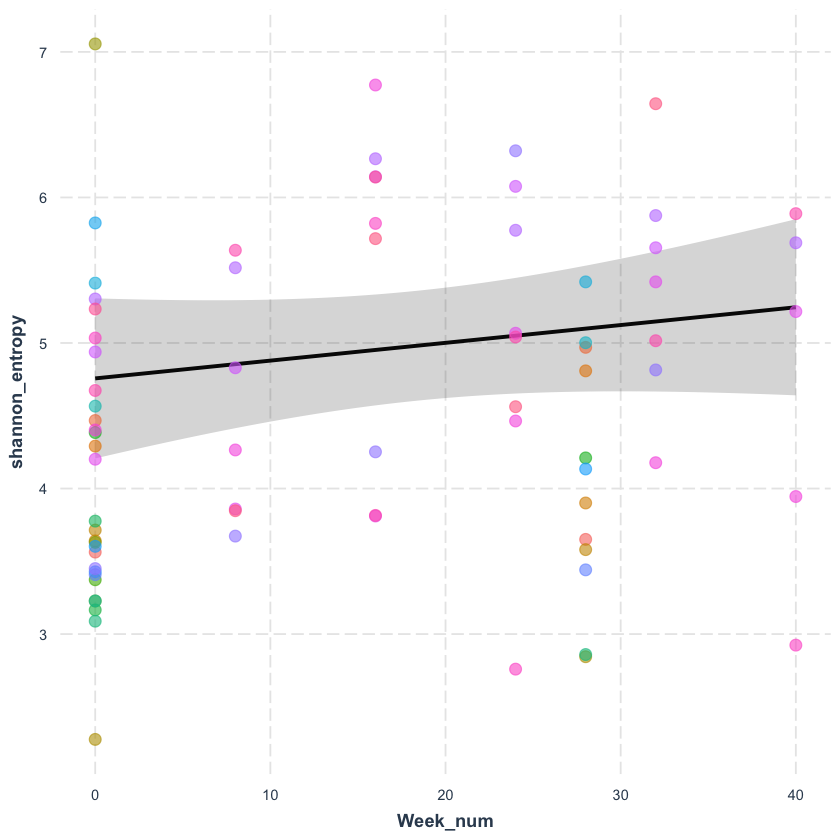

In [14]:
effect_plot(model1sh, pred = Week_num, interval = TRUE)+
geom_point(data = metadata.sub, aes(color=Patient), alpha=0.6, size=3, na.rm = TRUE)+
guides(color = "none")

Confidence intervals for merMod models is an experimental feature. The
intervals reflect only the variance of the fixed effects, not the random
effects.



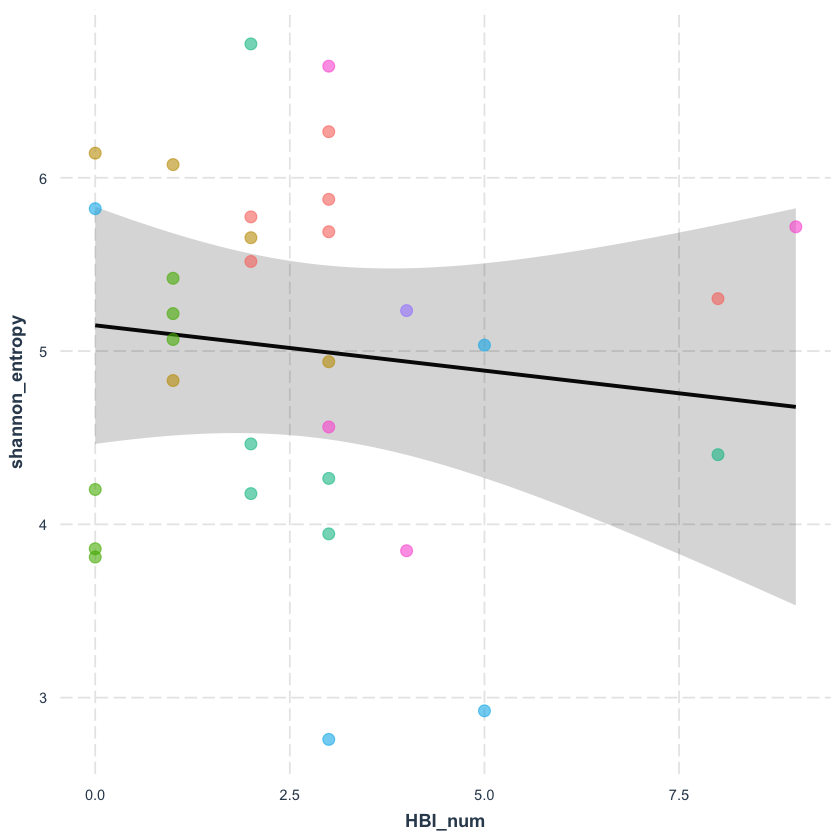

In [15]:
effect_plot(model2sh, pred = HBI_num, interval = TRUE)+
geom_point(data = metadata.subCD, aes(color=Patient), alpha=0.6, size=3, na.rm = TRUE)+
guides(color = "none")

Confidence intervals for merMod models is an experimental feature. The
intervals reflect only the variance of the fixed effects, not the random
effects.



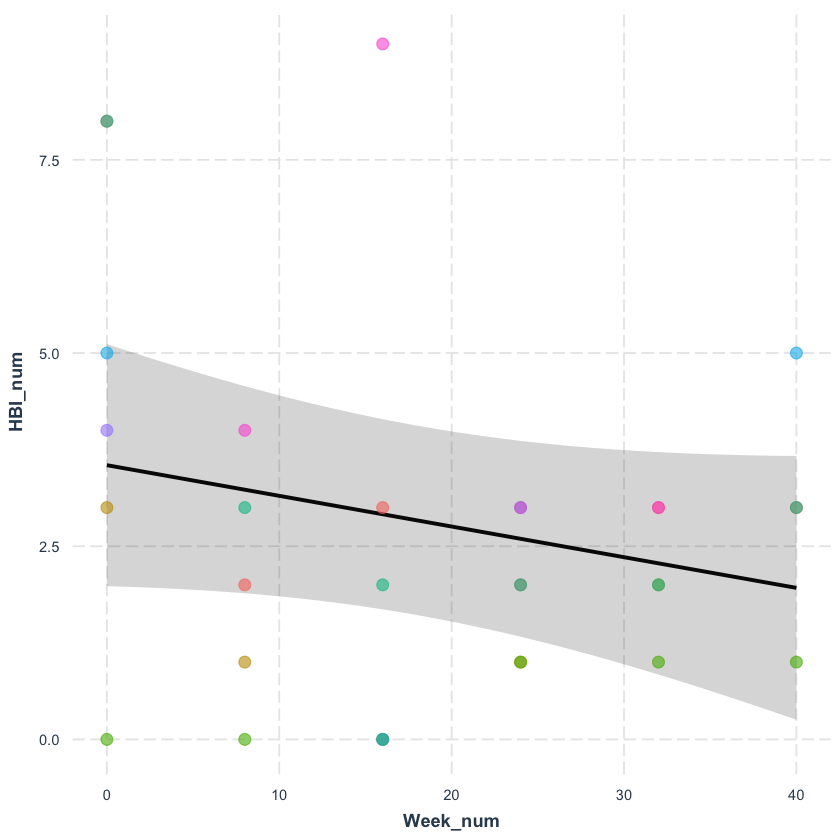

In [16]:
effect_plot(model3, pred = Week_num, interval = TRUE)+
geom_point(data = metadata.subCD, aes(color=Patient), alpha=0.6, size=3, na.rm = TRUE)+
guides(color = "none")

Confidence intervals for merMod models is an experimental feature. The
intervals reflect only the variance of the fixed effects, not the random
effects.



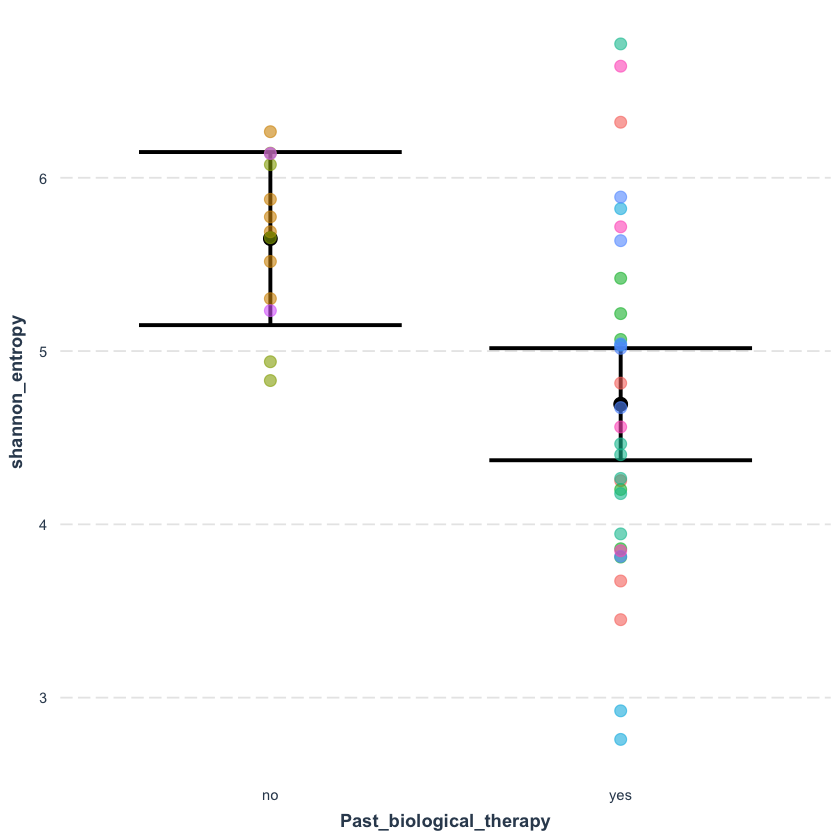

In [21]:
effect_plot(model5sh, pred = Past_biological_therapy, interval = TRUE)+
geom_point(data = metadata.subUST, aes(color=Patient), alpha=0.6, size=3, na.rm = TRUE)+
guides(color = "none")